# Trans-pQTL Colocalization

**Created**: 26 March 2022

## Environment

In [1]:
if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

Loading required namespace: patchwork



In [2]:
library(tidyverse)
library(data.table)
library(coloc)
library(patchwork)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


This is coloc version 5.1.1



## Load Summary Information

In [3]:
cis.pqtl.summary <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_all.RDS") %>%
    as.data.frame() %>%
    dplyr::mutate(pQTL_ID=pQTL_Protein)

In [4]:
head(cis.pqtl.summary)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene,pQTL_ID
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,rs79059311,8,21133434,-0.03131867,0.05348602,-0.5855487,0.5584249,O43593,ENSG00000168453,O43593
2,rs34883006,8,21133873,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453,O43593
3,rs35853955,8,21135276,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453,O43593
4,rs78546479,8,21135388,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453,O43593
5,rs13261360,8,21137022,-0.04384358,0.05411982,-0.8101205,0.4181245,O43593,ENSG00000168453,O43593
6,rs1563919,8,21139106,0.01378641,0.02750455,0.5012410,0.6162944,O43593,ENSG00000168453,O43593


In [5]:
cis.pqtl.loci <- split(cis.pqtl.summary, cis.pqtl.summary$pQTL_ID)

In [6]:
trans.pqtl.summary <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/proteomics/pqtl/pqtl_ms2019/trans_pqtl_all.RDS") %>%
    as.data.frame() %>%
    dplyr::mutate(pQTL_ID=paste0(pQTL_Protein, "-", pQTL_Locus))

In [7]:
head(trans.pqtl.summary)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,pQTL_Locus,pQTL_ID
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,rs1859088,16,71172933,-0.008919439,0.01159847,-0.7690189,0.44192228,P19827,pQTL_1,P19827-pQTL_1
2,rs9939485,16,71173976,0.003324982,0.01167227,0.2848616,0.77575395,P19827,pQTL_1,P19827-pQTL_1
3,rs73579049,16,71174790,0.058046542,0.02613427,2.2210892,0.02656642,P19827,pQTL_1,P19827-pQTL_1
4,rs28571623,16,71177078,0.005178698,0.01255262,0.4125593,0.67995917,P19827,pQTL_1,P19827-pQTL_1
5,rs28663037,16,71177079,0.004538120,0.01260812,0.3599362,0.71891493,P19827,pQTL_1,P19827-pQTL_1
6,rs9936084,16,71178368,0.006118056,0.01245574,0.4911836,0.62333870,P19827,pQTL_1,P19827-pQTL_1


Split summary statistics by locus.

In [8]:
trans.pqtl.loci <- split(trans.pqtl.summary, trans.pqtl.summary$pQTL_ID)

## Load Protein Expression

In [9]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")
gene.exp <- t(gene.exp)
rownames(gene.exp) <- gsub("^GA", "", rownames(gene.exp))

In [10]:
head(gene.exp)

,ENSG00000230521,ENSG00000225864,ENSG00000227766,ENSG00000237669,ENSG00000271581,ENSG00000285647,ENSG00000204435,ENSG00000231074,ENSG00000227262,ENSG00000206337,⋯,ENSG00000288253,ENSG00000288302,ENSG00000288349,ENSG00000288393,ENSG00000288398,ENSG00000288538,ENSG00000288559,ENSG00000288562,ENSG00000288573,ENSG00000288582
UK02270173_3,0.6644339,0.9817872,1.2117156,0.6420763,2.474490,0.00000000,3.704888,4.027339,0.06866465,7.318038,⋯,0.5247755,1.3000450,0.5247755,0.92735960,1.133738,1.1337380,0.9457312,0.87079780,0.31467050,2.811486
UK15130120_3,0.5827160,0.4387994,0.3068267,0.6925683,1.331531,0.03379072,4.261280,3.634898,0.25046090,6.369198,⋯,0.5125515,1.7424980,0.4883840,0.06680807,1.860177,0.6496258,0.9264084,0.06680807,0.22143010,3.343063
UK58000006_3,0.4046756,0.6022344,0.6625010,0.9792012,1.831046,0.00000000,3.719682,3.597655,0.00000000,6.837021,⋯,0.2947282,1.5250610,0.6326824,0.66250100,1.315821,1.4755270,1.0258310,0.29472820,0.13374420,4.010874
UK47010004_3,0.2090516,0.9234049,0.7996329,0.6992958,2.475317,0.05517067,4.169617,3.016982,0.30321616,7.723203,⋯,0.3032162,0.9527571,1.0911770,0.30321620,1.143029,1.8370600,0.7669565,0.25690200,0.10830900,2.610379
UK42020088_5,0.2211571,0.2211571,0.6445686,0.3765156,1.881204,0.67482702,4.527758,3.624300,0.04702687,6.350747,⋯,0.0925691,1.2174450,0.6748270,0.13671760,1.088510,2.0637890,0.8172741,0.04702687,0.22115710,2.434768
UK47490007_3,0.4288519,1.1450686,0.3130290,1.0756817,2.053137,0.00000000,4.581986,3.101136,0.00000000,6.728267,⋯,0.5012039,1.9916780,1.1895390,0.35267880,1.211271,0.7590055,0.6033524,1.02749800,0.09657541,3.816079


In [11]:
pqtl.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/Genotyping/All_genotyping_merged_filtered_b38_refiltered_rsID.fam", drop=3:6)
colnames(pqtl.geno) <- c("family", "individual")
protein.exp <- read.csv("/lustre/scratch119/humgen/projects/gains_team282/proteomics/MS2019_processed_data/data_291x1860_MS2019.csv", row.names=1)
protein.exp <- t(protein.exp)
rownames(protein.exp) <- gsub("^X", "", gsub("\\..*$", "", rownames(protein.exp)))
protein.info <- read.csv("/lustre/scratch119/humgen/projects/gains_team282/proteomics/MS2019_processed_data/sample_info_1860_MS2019.csv", row.names=1)
protein.info <- protein.info %>%
    dplyr::filter(Patient %in% pqtl.geno$individual)
protein.info$Patient <- gsub("^GA", "", protein.info$Patient)
protein.exp <- protein.exp[paste0(protein.info$Injection),]

In [12]:
head(protein.exp)

,A0A075B6I9,A0A075B6P5,A0A087WW87,A0A0B4J1V0,A0A0B4J1V2,A0A0B4J1V6,A0A0C4DH31,A0A0C4DH38,A0A0C4DH72,A2VEC9,⋯,A6NJ88,A1L157,P51159,Q16651,Q8N2U0,Q92527,Q969V1,Q96BR1,Q86VK4,P11309
3439,14.06345,16.03609,15.50883,17.24218,15.51442,12.31986,13.16036,10.45236,12.21718,13.56052,⋯,16.83735,16.45940,13.20547,14.32942,13.36351,14.42539,15.60032,11.94983,14.23356,12.40308
3440,14.25070,13.03507,11.92701,17.42626,17.30772,12.15789,14.40737,13.44694,11.94252,13.98888,⋯,13.48823,15.69690,13.67583,14.95902,13.37234,14.83777,15.51079,11.73576,14.14074,12.39263
3441,15.02175,16.21867,11.63172,16.83393,15.82620,12.19347,14.19060,13.89406,11.88166,14.30399,⋯,15.89227,13.91093,13.71481,13.77387,13.49517,14.86029,15.37486,11.84970,14.94318,12.00046
3442,14.51218,12.77215,12.62772,16.83453,16.02655,11.92471,14.63931,13.94733,11.86421,14.11091,⋯,14.23426,15.79861,13.70199,14.74071,14.88895,14.60881,15.40724,12.30258,15.02014,11.31928
3443,15.26602,12.62202,11.30896,16.82177,16.24261,12.21507,14.17042,12.75975,11.90041,14.28217,⋯,14.45529,15.21440,13.33776,14.71806,14.73925,14.69318,15.41036,11.92065,15.00276,10.80000
3444,14.64062,16.35344,11.26297,17.31887,15.64070,12.84245,14.26904,13.95091,12.90014,14.13249,⋯,13.18055,14.29860,13.58296,13.89738,14.48849,14.37257,15.56780,11.80031,14.95080,11.28800


## COLOC

In [13]:
trans.pqtl.summary %>%
    dplyr::group_by(pQTL_ID) %>%
    dplyr::summarize(Chr=Chr[1])

pQTL_ID,Chr
<chr>,<int>
P00751-pQTL_1,14
P02787-pQTL_1,14
P10909-pQTL_1,16
P19827-pQTL_1,16
P35858-pQTL_1,8
Q92954-pQTL_1,14


In [14]:
chr.14.ids <- c("P00751-pQTL_1", "P02787-pQTL_1", "Q92954-pQTL_1")

chr.14.loci <- lapply(chr.14.ids, function(id) {

    locus <- list()
    locus$beta <- trans.pqtl.loci[[id]]$pQTL_beta
    locus$varbeta <- trans.pqtl.loci[[id]]$pQTL_SE^2
    locus$snp <- trans.pqtl.loci[[id]]$SNP
    locus$position <- trans.pqtl.loci[[id]]$Position
    locus$type <- "quant"
    locus$sdY <- sd(protein.exp[,trans.pqtl.loci[[id]]$pQTL_Protein[1]], na.rm=TRUE)
    
    return(locus)
})

abf.res = suppressWarnings(coloc.abf(chr.14.loci[[1]], chr.14.loci[[2]]))

abf.res.df.1 = data.frame(t(abf.res$summary))
abf.res.df.1$trans.pQTL.1 = chr.14.ids[1]
abf.res.df.1$trans.pQTL.2 = chr.14.ids[2]

abf.res = suppressWarnings(coloc.abf(chr.14.loci[[2]], chr.14.loci[[3]]))

abf.res.df.2 = data.frame(t(abf.res$summary))
abf.res.df.2$trans.pQTL.1 = chr.14.ids[2]
abf.res.df.2$trans.pQTL.2 = chr.14.ids[3]

abf.res = suppressWarnings(coloc.abf(chr.14.loci[[1]], chr.14.loci[[3]]))

abf.res.df.3 = data.frame(t(abf.res$summary))
abf.res.df.3$trans.pQTL.1 = chr.14.ids[1]
abf.res.df.3$trans.pQTL.2 = chr.14.ids[3]

chr.14.res <- rbind(abf.res.df.1, abf.res.df.2, abf.res.df.3)
chr.14.res$Locus = "14"

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.05e-99  2.24e-28  9.41e-74  1.99e-03  9.98e-01 
[1] "PP abf for shared variant: 99.8%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.12e-29  2.83e-04  7.48e-26  1.00e+00  2.04e-04 
[1] "PP abf for shared variant: 0.0204%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 8.91e-75  2.83e-04  3.15e-71  1.00e+00  1.56e-04 
[1] "PP abf for shared variant: 0.0156%"


In [15]:
chr.16.ids <- c("P10909-pQTL_1", "P19827-pQTL_1")

chr.16.loci <- lapply(chr.16.ids, function(id) {

    locus <- list()
    locus$beta <- trans.pqtl.loci[[id]]$pQTL_beta
    locus$varbeta <- trans.pqtl.loci[[id]]$pQTL_SE^2
    locus$snp <- trans.pqtl.loci[[id]]$SNP
    locus$position <- trans.pqtl.loci[[id]]$Position
    locus$type <- "quant"
    locus$sdY <- sd(protein.exp[,trans.pqtl.loci[[id]]$pQTL_Protein[1]], na.rm=TRUE)
    
    return(locus)
})

abf.res = suppressWarnings(coloc.abf(chr.16.loci[[1]], chr.16.loci[[2]]))

chr.16.res = data.frame(t(abf.res$summary))
chr.16.res$trans.pQTL.1 = chr.16.ids[1]
chr.16.res$trans.pQTL.2 = chr.16.ids[2]
chr.16.res$Locus = "16"

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.82e-24  2.24e-16  1.19e-11  4.66e-04  1.00e+00 
[1] "PP abf for shared variant: 100%"


In [16]:
coloc.res = dplyr::bind_rows(chr.14.res, chr.16.res)

## COLOC with cis-pQTL

In [17]:
serpina1.id <- "P01009"

serpina1.locus <- list()
serpina1.locus$beta <- cis.pqtl.loci[[serpina1.id]]$pQTL_beta
serpina1.locus$varbeta <- cis.pqtl.loci[[serpina1.id]]$pQTL_SE^2
serpina1.locus$snp <- cis.pqtl.loci[[serpina1.id]]$SNP
serpina1.locus$position <- cis.pqtl.loci[[serpina1.id]]$Position
serpina1.locus$type <- "quant"
serpina1.locus$sdY <- sd(protein.exp[,cis.pqtl.loci[[serpina1.id]]$pQTL_Protein[1]], na.rm=TRUE)

abf.res = suppressWarnings(coloc.abf(chr.14.loci[[1]], serpina1.locus))

abf.res = suppressWarnings(coloc.abf(chr.14.loci[[2]], serpina1.locus))

abf.res = suppressWarnings(coloc.abf(chr.14.loci[[3]], serpina1.locus))

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
2.84e-128  9.04e-58  3.15e-71  1.00e+00  3.28e-27 
[1] "PP abf for shared variant: 3.28e-25%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.77e-83  9.04e-58  7.49e-26  1.00e+00  3.38e-26 
[1] "PP abf for shared variant: 3.38e-24%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.56e-61  9.03e-58  2.83e-04  1.00e+00  6.58e-05 
[1] "PP abf for shared variant: 0.00658%"


In [18]:
hp.id <- "P00738"

hp.locus <- list()
hp.locus$beta <- cis.pqtl.loci[[hp.id]]$pQTL_beta
hp.locus$varbeta <- cis.pqtl.loci[[hp.id]]$pQTL_SE^2
hp.locus$snp <- cis.pqtl.loci[[hp.id]]$SNP
hp.locus$position <- cis.pqtl.loci[[hp.id]]$Position
hp.locus$type <- "quant"
hp.locus$sdY <- sd(protein.exp[,cis.pqtl.loci[[hp.id]]$pQTL_Protein[1]], na.rm=TRUE)

abf.res = suppressWarnings(coloc.abf(chr.16.loci[[1]], hp.locus))

abf.res = suppressWarnings(coloc.abf(chr.16.loci[[2]], hp.locus))

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.46e-09  1.80e-01  2.25e-09  2.76e-01  5.45e-01 
[1] "PP abf for shared variant: 54.5%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 2.65e-14  1.73e-01  4.07e-14  2.66e-01  5.61e-01 
[1] "PP abf for shared variant: 56.1%"


## Colocalizing Loci

In [19]:
coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::filter(Coloc.Factor > 0.7) %>%
    dplyr::arrange(desc(Coloc.Factor))

nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,trans.pQTL.1,trans.pQTL.2,Locus,Coloc.Factor
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
2870,1.824893e-24,2.240618e-16,1.193580e-11,0.0004659529,0.9995340,P10909-pQTL_1,P19827-pQTL_1,16,0.9995340
3148,7.048377e-99,2.239966e-28,9.413375e-74,0.0019935532,0.9980064,P00751-pQTL_1,P02787-pQTL_1,14,0.9980064


In [20]:
trans.pqtl.summary %>%
    dplyr::group_by(pQTL_ID) %>%
    dplyr::slice_min(pQTL_pval, n=1)

SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,pQTL_Locus,pQTL_ID
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
rs11846959,14,94379979,-0.3065649,0.01614662,-18.986322,3.309735e-69,P00751,pQTL_1,P00751-pQTL_1
rs11846959,14,94379979,-0.2137874,0.01793464,-11.920362,6.923034e-31,P02787,pQTL_1,P02787-pQTL_1
rs9302635,16,72110275,0.1145890,0.01466176,7.815500,1.200982e-14,P10909,pQTL_1,P10909-pQTL_1
rs9302635,16,72110275,0.1319606,0.01429908,9.228609,1.454631e-19,P19827,pQTL_1,P19827-pQTL_1
rs16917722,8,95461382,-0.4991650,0.06949047,-7.183215,1.673847e-12,P35858,pQTL_1,P35858-pQTL_1
rs76368529,8,95464005,-0.4991650,0.06949047,-7.183215,1.673847e-12,P35858,pQTL_1,P35858-pQTL_1
rs868420,8,95464011,-0.4991650,0.06949047,-7.183215,1.673847e-12,P35858,pQTL_1,P35858-pQTL_1
rs74586905,8,95466198,-0.4991650,0.06949047,-7.183215,1.673847e-12,P35858,pQTL_1,P35858-pQTL_1
rs2318880,8,95466220,-0.4991650,0.06949047,-7.183215,1.673847e-12,P35858,pQTL_1,P35858-pQTL_1


## Chr 14 Locus

The Chromosome 14 Locus for the overlapping trans-pQTL is in the intronic region of *SERPINA1*. The SERPIN family of proteins act as inhibitors of proteases involved in the immune response in blood. I will create association plots with LD information to visualize this locus.

In [21]:
# DA Peaks
da.peaks <- read.csv("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/da_peak_set.csv", row.names=1)

In [22]:
# SERPINA1
serpina1 = "ENSG00000197249"

serpina1.summary <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LD/chr14_conditional_cis_eQTL_summary_statistics.tsv") %>%
    as.data.frame() %>%
    dplyr::filter(Gene == serpina1)

In [23]:
gene.locus.data <- serpina1.summary %>%
    dplyr::mutate(Signal = as.character(Signal)) %>%
    dplyr::select(SNP, Position, P_Value, Signal) %>%
    dplyr::filter(Position < 94.5e6, Position > 94.25e6)

protein.locus.data <- trans.pqtl.summary %>%
    dplyr::filter(pQTL_ID %in% chr.14.ids) %>%
    dplyr::bind_rows(
        cis.pqtl.summary %>% 
            dplyr::filter(pQTL_Protein == serpina1.id) %>% 
            dplyr::select(SNP, Position, pQTL_pval) %>% 
            dplyr::mutate(pQTL_ID=serpina1.id)
    ) %>%
    dplyr::select(SNP, Position, P_Value=pQTL_pval, Signal=pQTL_ID) %>%
    dplyr::filter(Position < 94.5e6, Position > 94.25e6)

In [24]:
# Load genotypes for the relevant loci
chr.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/data/genotypes/eqtl_genotypes_14.raw", sep=" ", drop=2:6)
chr.geno <- as.data.frame(chr.geno)
colnames(chr.geno) <- gsub("X", "", colnames(chr.geno))
colnames(chr.geno) <- sapply(strsplit(colnames(chr.geno), "_"), function(x) { x[1] })
rownames(chr.geno) <- gsub("^GA", "", chr.geno[, 1])
chr.geno[, 1] <- NULL

gene.ld <- cor(chr.geno[,intersect(colnames(chr.geno), gene.locus.data$SNP)], use="pairwise.complete.obs")

In [25]:
chr.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/data/genotypes/trans_pqtl_genotypes.raw", sep=" ", drop=2:6)
chr.geno <- as.data.frame(chr.geno)
colnames(chr.geno) <- gsub("X", "", colnames(chr.geno))
colnames(chr.geno) <- sapply(strsplit(colnames(chr.geno), "_"), function(x) { x[1] })
rownames(chr.geno) <- gsub("^GA", "", chr.geno[, 1])
chr.geno[, 1] <- NULL

prot.ld <- cor(chr.geno[,intersect(colnames(chr.geno), protein.locus.data$SNP)], use="pairwise.complete.obs")

In [26]:
gene.ld.info <- do.call(rbind, gene.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1) %>%
    apply(., 1, function(x) {
        as.data.frame(gene.ld[, x[1]]) %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(SNP=rownames(.), Signal = x[4], LD=LD^2)
    })
)

protein.ld.info <- do.call(rbind, protein.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1) %>%
    apply(., 1, function(x) {
        as.data.frame(prot.ld[, x[1]]) %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(SNP=rownames(.), Signal = x[4], LD=LD^2)
    })
)

In [27]:
gene.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1)

protein.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1)

SNP,Position,P_Value,Signal
<chr>,<int>,<dbl>,<chr>
rs12884390,94396493,1.40741e-25,1
rs76221089,94375518,6.60330e-11,2
rs79247904,94309697,1.67704e-07,3
rs72704399,94344873,2.89895e-06,4
rs72704401,94345183,2.89895e-06,4
rs79867353,94345227,2.89895e-06,4
rs56306384,94347676,2.89895e-06,4


SNP,Position,P_Value,Signal
<chr>,<int>,<dbl>,<chr>
rs11846959,94379979,3.309735e-69,P00751-pQTL_1
rs1243162,94380606,8.174763e-59,P01009
rs11846959,94379979,6.923034e-31,P02787-pQTL_1
rs28929474,94378610,3.282674e-13,Q92954-pQTL_1


In [28]:
gene.da.peaks <- da.peaks %>%
    dplyr::filter(Peak.Start >= min(gene.locus.data$Position), Peak.End <= max(gene.locus.data$Position), Peak.Chr == "14") %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94396493 & Peak.End >= 94396493, "eQTL 1", "None")) %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94375518 & Peak.End >= 94375518, "eQTL 2", Overlaps)) %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94309697 & Peak.End >= 94309697, "eQTL 3", Overlaps)) %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94344873 & Peak.End >= 94344873, "eQTL 4", Overlaps))

protein.da.peaks <- da.peaks %>%
    dplyr::filter(Peak.Start >= min(protein.locus.data$Position), Peak.End <= max(protein.locus.data$Position), Peak.Chr == "14") %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94380606 & Peak.End >= 94380606, "SERPINA1", "None")) %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94379979 & Peak.End >= 94379979, "CLU and ITIH1", Overlaps)) %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 94378610 & Peak.End >= 94378610, "PRG4", Overlaps))

Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


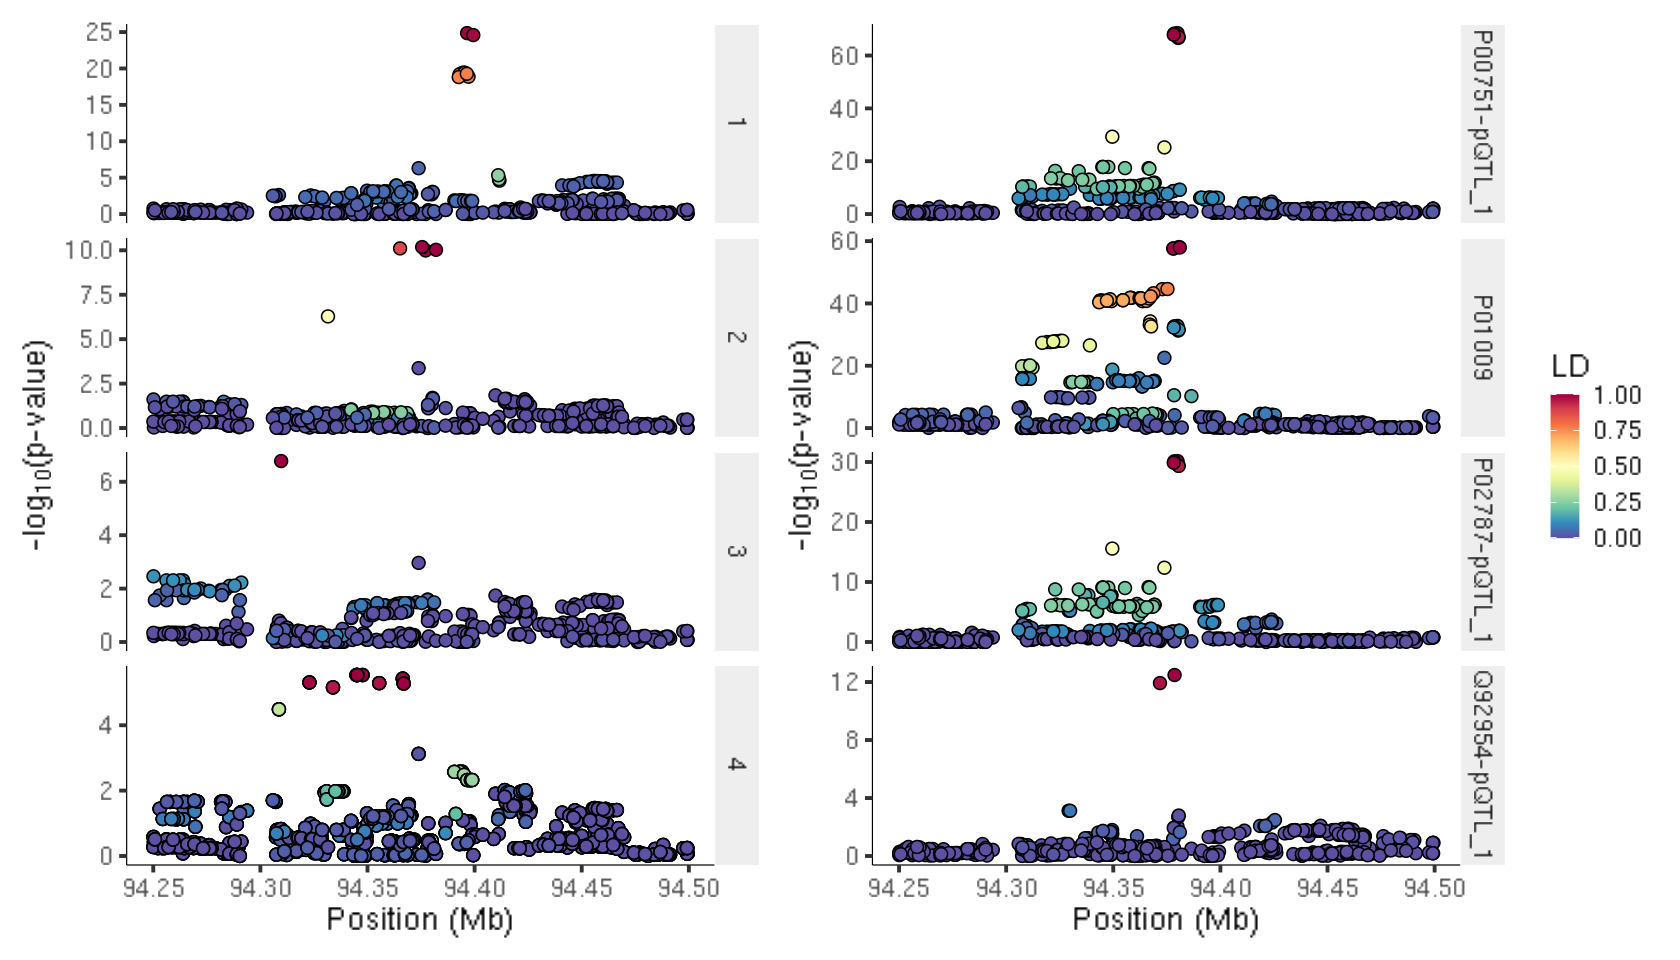

In [29]:
options(repr.plot.width=14, repr.plot.height=8)

palette <- colorRampPalette(rev(RColorBrewer::brewer.pal(11, "Spectral")))

p1 <- merge(gene.locus.data, gene.ld.info, by=c("SNP", "Signal")) %>%
    dplyr::filter(!grepl("pQTL", Signal))%>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=-log10(P_Value), fill=LD), pch=21, size=I(3)) +
    scale_fill_gradientn(colors=palette(100), limits=c(0, 1)) +
    guides(fill="none") +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    facet_grid(Signal ~ ., scales="free_y") +
    ggplot_theme

p2 <- merge(protein.locus.data, protein.ld.info, by=c("SNP", "Signal")) %>%
    dplyr::filter(grepl("pQTL|P01009", Signal))%>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=-log10(P_Value), fill=LD), pch=21, size=I(3)) +
    scale_fill_gradientn(colors=palette(100), limits=c(0, 1)) +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    facet_grid(Signal ~ ., scales="free_y") +
    ggplot_theme +
    theme(legend.position="right")

p1 + p2

ggsave("01_Colocalization/results/trans_pqtl_chr_14.svg", width=14, height=8)

In [30]:
cis.eqtl.signals <- split(serpina1.summary, serpina1.summary$Signal)

do.call(rbind, lapply(names(cis.eqtl.signals), function(eqtl.signal) {

    cis.eqtl.signals[[eqtl.signal]] <- cis.eqtl.signals[[eqtl.signal]] %>%
        dplyr::filter(!is.na(Beta))

    cis.eqtl.locus <- list()
    cis.eqtl.locus$beta <- cis.eqtl.signals[[eqtl.signal]]$Beta
    cis.eqtl.locus$varbeta <- cis.eqtl.signals[[eqtl.signal]]$SE^2
    cis.eqtl.locus$snp <- cis.eqtl.signals[[eqtl.signal]]$SNP
    cis.eqtl.locus$position <- cis.eqtl.signals[[eqtl.signal]]$Position
    cis.eqtl.locus$type <- "quant"
    cis.eqtl.locus$sdY <- sd(gene.exp[, serpina1], na.rm=TRUE)

    abf.res = suppressWarnings(coloc.abf(cis.eqtl.locus, chr.14.loci[[3]]))

    abf.res.df = data.frame(t(abf.res$summary))
    abf.res.df$eQTL.Signal = eqtl.signal

    return(abf.res.df)
}))

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 6.49e-23  2.83e-04  2.29e-19  1.00e+00  6.88e-06 
[1] "PP abf for shared variant: 0.000688%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 7.33e-09  2.83e-04  2.59e-05  1.00e+00  1.17e-05 
[1] "PP abf for shared variant: 0.00117%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 5.29e-05  2.27e-04  1.87e-01  8.03e-01  1.00e-02 
[1] "PP abf for shared variant: 1%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.000044  0.000236  0.155000  0.834000  0.010300 
[1] "PP abf for shared variant: 1.03%"


nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,eQTL.Signal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3062,6.485697e-23,0.0002831465,2.289916e-19,0.9997100,6.883744e-06,1
3062,7.328094e-09,0.0002831378,2.587342e-05,0.9996793,1.170873e-05,2
3062,5.294461e-05,0.0002273650,1.869324e-01,0.8027513,1.003600e-02,3
3065,4.400780e-05,0.0002362205,1.553791e-01,0.8340174,1.032334e-02,4


## Chr 16 Locus

In [31]:
# DA Peaks
da.peaks <- read.csv("~/gains_team282/epigenetics/accessibility/analysis/atac_seq/immune/da_peak_set.csv", row.names=1)

In [32]:
# HP
hp = "ENSG00000257017"

hp.summary <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LD/chr16_conditional_cis_eQTL_summary_statistics.tsv") %>%
    as.data.frame() %>%
    dplyr::filter(Gene == hp)

In [33]:
gene.locus.data <- hp.summary %>%
    dplyr::mutate(Signal = as.character(Signal)) %>%
    dplyr::select(SNP, Position, P_Value, Signal) %>%
    dplyr::filter(Position < 72.5e6, Position > 71.75e6)

protein.locus.data <- trans.pqtl.summary %>%
    dplyr::filter(pQTL_ID %in% chr.16.ids) %>%
    dplyr::bind_rows(
        cis.pqtl.summary %>% 
            dplyr::filter(pQTL_Protein == hp.id) %>% 
            dplyr::select(SNP, Position, pQTL_pval) %>% 
            dplyr::mutate(pQTL_ID=hp.id)
    ) %>%
    dplyr::select(SNP, Position, P_Value=pQTL_pval, Signal=pQTL_ID) %>%
    dplyr::filter(Position < 72.5e6, Position > 71.75e6)

In [34]:
# Load genotypes for the relevant loci
chr.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/data/genotypes/eqtl_genotypes_16.raw", sep=" ", drop=2:6)
chr.geno <- as.data.frame(chr.geno)
colnames(chr.geno) <- gsub("X", "", colnames(chr.geno))
colnames(chr.geno) <- sapply(strsplit(colnames(chr.geno), "_"), function(x) { x[1] })
rownames(chr.geno) <- gsub("^GA", "", chr.geno[, 1])
chr.geno[, 1] <- NULL

gene.ld <- cor(chr.geno[,intersect(colnames(chr.geno), gene.locus.data$SNP)], use="pairwise.complete.obs")

In [35]:
chr.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/nikhil/data/genotypes/trans_pqtl_genotypes.raw", sep=" ", drop=2:6)
chr.geno <- as.data.frame(chr.geno)
colnames(chr.geno) <- gsub("X", "", colnames(chr.geno))
colnames(chr.geno) <- sapply(strsplit(colnames(chr.geno), "_"), function(x) { x[1] })
rownames(chr.geno) <- gsub("^GA", "", chr.geno[, 1])
chr.geno[, 1] <- NULL

prot.ld <- cor(chr.geno[,intersect(colnames(chr.geno), protein.locus.data$SNP)], use="pairwise.complete.obs")

In [36]:
gene.ld.info <- do.call(rbind, gene.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1) %>%
    apply(., 1, function(x) {
        as.data.frame(gene.ld[, x[1]]) %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(SNP=rownames(.), Signal = x[4], LD=LD^2)
    })
)

protein.ld.info <- do.call(rbind, protein.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1) %>%
    apply(., 1, function(x) {
        as.data.frame(prot.ld[, x[1]]) %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(SNP=rownames(.), Signal = x[4], LD=LD^2)
    })
)

In [37]:
gene.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1)

protein.locus.data %>%
    dplyr::group_by(Signal) %>%
    dplyr::slice_min(P_Value, n=1)

SNP,Position,P_Value,Signal
<chr>,<int>,<dbl>,<chr>
rs7186207,72001460,2.84011e-25,1
rs7186207,72001460,1.43490e-59,2


SNP,Position,P_Value,Signal
<chr>,<int>,<dbl>,<chr>
rs3213419,72008529,3.135717e-05,P00738
rs3213421,72008543,3.135717e-05,P00738
rs9302635,72110275,1.200982e-14,P10909-pQTL_1
rs9302635,72110275,1.454631e-19,P19827-pQTL_1


In [38]:
gene.da.peaks <- da.peaks %>%
    dplyr::filter(Peak.Start >= min(gene.locus.data$Position), Peak.End <= max(gene.locus.data$Position), Peak.Chr == "16") %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 72001460 & Peak.End >= 72001460, "eQTL", "None"))

protein.da.peaks <- da.peaks %>%
    dplyr::filter(Peak.Start >= min(protein.locus.data$Position), Peak.End <= max(protein.locus.data$Position), Peak.Chr == "16") %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 72008529 & Peak.End >= 72008529, "HP", "None")) %>%
    dplyr::mutate(Overlaps=ifelse(Peak.Start <= 72110275 & Peak.End >= 72110275, "CLU and ITIH1", Overlaps))

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


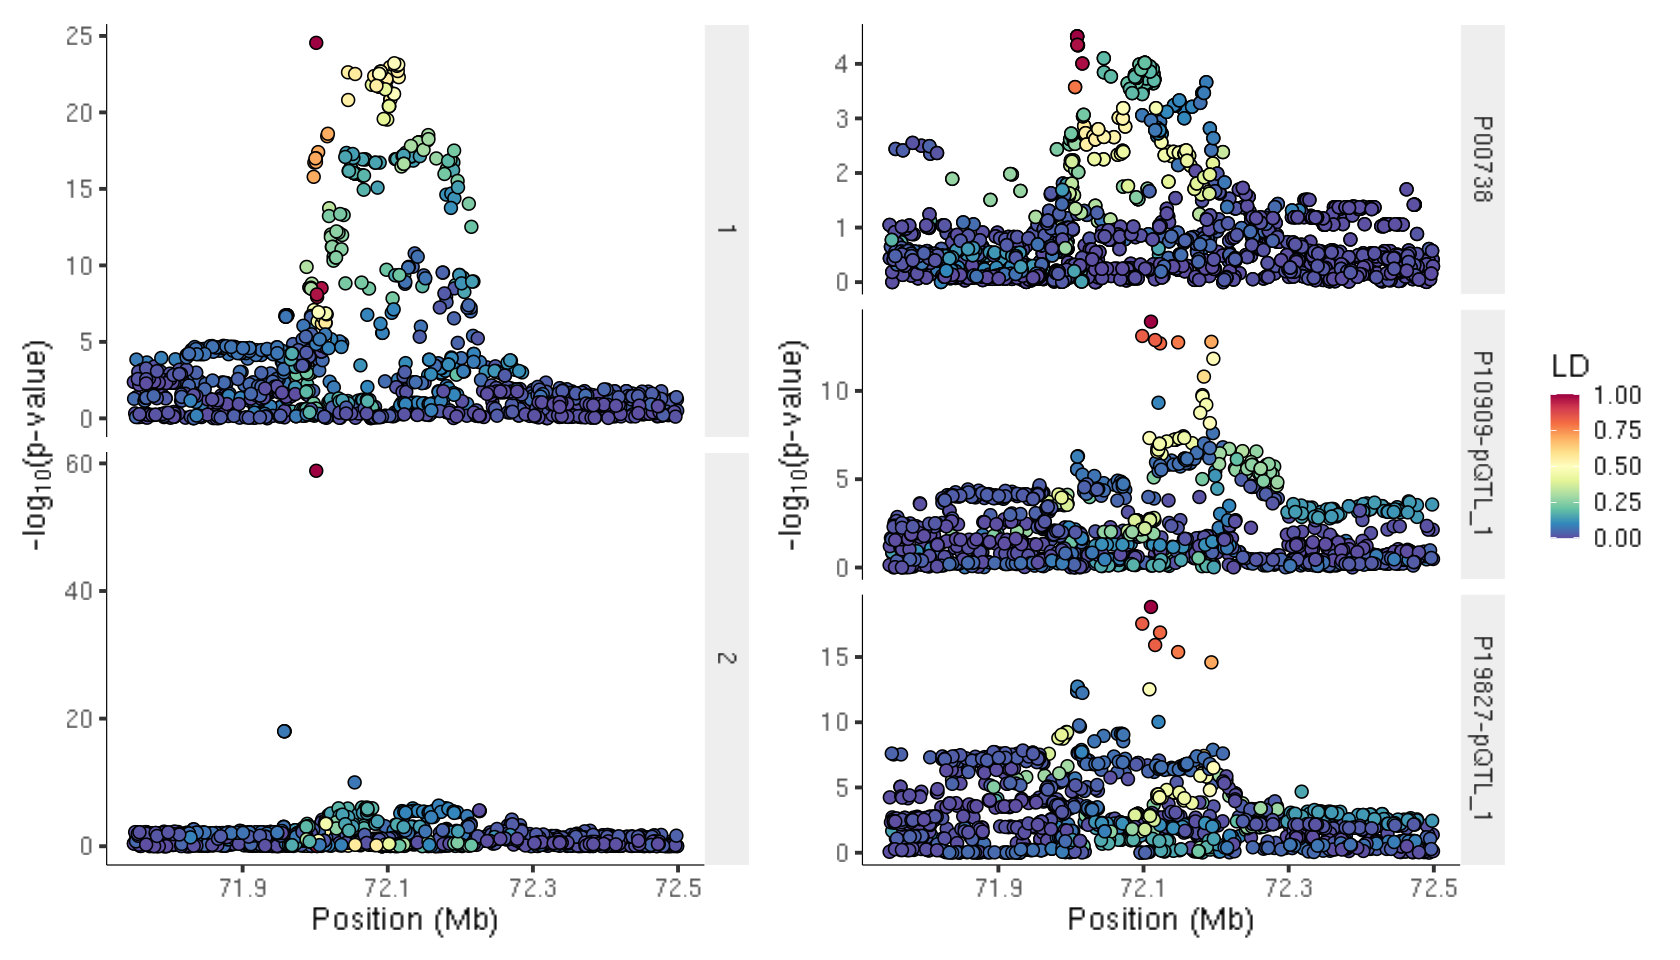

In [39]:
options(repr.plot.width=14, repr.plot.height=8)

palette <- colorRampPalette(rev(RColorBrewer::brewer.pal(11, "Spectral")))

p1 <- merge(gene.locus.data, gene.ld.info, by=c("SNP", "Signal")) %>%
    dplyr::filter(!grepl("pQTL", Signal))%>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=-log10(P_Value), fill=LD), pch=21, size=I(3)) +
    scale_fill_gradientn(colors=palette(100), limits=c(0, 1)) +
    guides(fill="none") +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    facet_grid(Signal ~ ., scales="free_y") +
    ggplot_theme

p2 <- merge(protein.locus.data, protein.ld.info, by=c("SNP", "Signal")) %>%
    dplyr::filter(grepl("pQTL|P00738", Signal))%>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=-log10(P_Value), fill=LD), pch=21, size=I(3)) +
    scale_fill_gradientn(colors=palette(100), limits=c(0, 1)) +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    facet_grid(Signal ~ ., scales="free_y") +
    ggplot_theme +
    theme(legend.position="right")

p1 + p2

ggsave("01_Colocalization/results/trans_pqtl_chr_16.svg", width=14, height=8)

In [40]:
cis.eqtl.signals <- split(hp.summary, hp.summary$Signal)

do.call(rbind, lapply(names(cis.eqtl.signals), function(eqtl.signal) {

    cis.eqtl.signals[[eqtl.signal]] <- cis.eqtl.signals[[eqtl.signal]] %>%
        dplyr::filter(!is.na(Beta))

    cis.eqtl.locus <- list()
    cis.eqtl.locus$beta <- cis.eqtl.signals[[eqtl.signal]]$Beta
    cis.eqtl.locus$varbeta <- cis.eqtl.signals[[eqtl.signal]]$SE^2
    cis.eqtl.locus$snp <- cis.eqtl.signals[[eqtl.signal]]$SNP
    cis.eqtl.locus$position <- cis.eqtl.signals[[eqtl.signal]]$Position
    cis.eqtl.locus$type <- "quant"
    cis.eqtl.locus$sdY <- sd(gene.exp[, hp], na.rm=TRUE)

    abf.res = suppressWarnings(coloc.abf(cis.eqtl.locus, chr.16.loci[[1]]))

    abf.res.df = data.frame(t(abf.res$summary))
    abf.res.df$eQTL.Signal = eqtl.signal

    return(abf.res.df)
}))

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.10e-27  8.14e-09  5.03e-19  1.00e+00  2.89e-08 
[1] "PP abf for shared variant: 2.89e-06%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.93e-60  8.14e-09  2.37e-52  1.00e+00  1.82e-10 
[1] "PP abf for shared variant: 1.82e-08%"


nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,eQTL.Signal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2733,4.095559e-27,8.144597e-09,5.028559e-19,1,2.893566e-08,1
2728,1.928582e-60,8.144598e-09,2.367928e-52,1,1.822153e-10,2
